# Block 6 Exercise 1: Non-Linear Classification

## MNIST Data
We return to the MNIST data set on handwritten digits to compare non-linear classification algorithms ...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

In [4]:
X.min()

0.0

In [5]:
#look at max/min value in the data
X.max()
X[:1].shape

(1, 784)

### E1.1: Cross-Validation and Support Vector Machines
Train and optimize  C-SVM classifier on MNIST (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* use a RBF kernel
* use *random search* with cross-validation to find the best settings for *gamma* and *C* (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV)

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [8]:
%%time
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

[LibSVM]Wall time: 4min 43s


0.969530612244898

In [9]:
n_iter_search = 5

# specify parameters and distributions
param_dist = {
    "C": np.linspace(0.1,15,n_iter_search),
    "gamma": ['scale', 'auto']
    }

# run randomized search
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, n_jobs=-1, verbose=10)

In [10]:
random_search.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed:  6.0min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  7.3min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed: 15.4min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 15.5min finished


[LibSVM]

In [11]:
print(random_search.best_params_)
print(random_search.best_score_)

{'gamma': 'scale', 'C': 11.275}
0.975047619047619


### E1.2: Pipelines and simple Neural Networks
Split the MNIST data into  train- and test-sets and then train and evaluate a simple Multi Layer Perceptron (MLP) network. Since the non-linear activation functions of MLPs are sensitive to the scaling on the input (recall the *sigmoid* function), we need to scale all input values to [0,1] 

* combine all steps of your training in a SKL pipeline (https://scikit-learn.org/stable/modules/compose.html#pipeline)
* use a SKL-scaler to scale the data (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* MLP Parameters: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
    * use a *SGD* solver
    * use *tanh* as activation function
    * compare networks with 1, 2 and 3 layers, use different numbers of neurons per layer
    * adjust training parameters *alpha* (regularization) and *learning rate* - how sensitive is the model to these parameters?
    * Hint: do not change all parameters at the same time, split into several experiments
* How hard is it to find the best parameters? How many experiments would you need to find the best parameters?
    


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPClassifier

import pandas as pd

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [17]:
my_data = {'step': [],
    'score': []}

step_score_table = pd.DataFrame(my_data)

In [18]:
%%time

estimators = [('minmax_scaler', MinMaxScaler()), ('mlp_classifier', MLPClassifier(activation='tanh',solver='sgd'))]
pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)


score=pipe.score(X_test, y_test)

step_score_table = step_score_table.append({'step': "Simple_MinMaxScaler+MLPClassifier",'score':score}, ignore_index=True)
print(score)

Iteration 1, loss = 1.78232248
Iteration 2, loss = 1.11249523
Iteration 3, loss = 0.85675403
Iteration 4, loss = 0.72629385
Iteration 5, loss = 0.64663508
Iteration 6, loss = 0.59221493
Iteration 7, loss = 0.55224376
Iteration 8, loss = 0.52157749
Iteration 9, loss = 0.49703157
Iteration 10, loss = 0.47684886
Iteration 11, loss = 0.45989504
Iteration 12, loss = 0.44536782
Iteration 13, loss = 0.43287169
Iteration 14, loss = 0.42182606
Iteration 15, loss = 0.41202970
Iteration 16, loss = 0.40319192
Iteration 17, loss = 0.39523917
Iteration 18, loss = 0.38803164
Iteration 19, loss = 0.38144501
Iteration 20, loss = 0.37539864
Iteration 21, loss = 0.36975732
Iteration 22, loss = 0.36453835
Iteration 23, loss = 0.35958753
Iteration 24, loss = 0.35507049
Iteration 25, loss = 0.35075090
Iteration 26, loss = 0.34673077
Iteration 27, loss = 0.34284896
Iteration 28, loss = 0.33921564
Iteration 29, loss = 0.33575756
Iteration 30, loss = 0.33245636
Iteration 31, loss = 0.32932032
Iteration 32, los

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.942734693877551
Wall time: 36.9 s


In [20]:
pipe['mlp_classifier'].n_layers_

3

In [21]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'minmax_scaler', 'mlp_classifier', 'minmax_scaler__copy', 'minmax_scaler__feature_range', 'mlp_classifier__activation', 'mlp_classifier__alpha', 'mlp_classifier__batch_size', 'mlp_classifier__beta_1', 'mlp_classifier__beta_2', 'mlp_classifier__early_stopping', 'mlp_classifier__epsilon', 'mlp_classifier__hidden_layer_sizes', 'mlp_classifier__learning_rate', 'mlp_classifier__learning_rate_init', 'mlp_classifier__max_fun', 'mlp_classifier__max_iter', 'mlp_classifier__momentum', 'mlp_classifier__n_iter_no_change', 'mlp_classifier__nesterovs_momentum', 'mlp_classifier__power_t', 'mlp_classifier__random_state', 'mlp_classifier__shuffle', 'mlp_classifier__solver', 'mlp_classifier__tol', 'mlp_classifier__validation_fraction', 'mlp_classifier__verbose', 'mlp_classifier__warm_start'])

In [22]:
n_iter_search = 10

# specify parameters and distributions
param_dist = {
    "mlp_classifier__alpha": np.linspace(0.001,0.1,n_iter_search),
    }

# run randomized search
random_search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=n_iter_search, n_jobs=-1, verbose=10)

random_search.fit(X_train, y_train);

print(random_search.best_params_)

score=random_search.best_score_

step_score_table = step_score_table.append({'step': "alpha_MinMaxScaler+MLPClassifier",'score':score}, ignore_index=True)
print(score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed: 14.7min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 15.9min finished


Iteration 1, loss = 1.80657638
Iteration 2, loss = 1.12853160
Iteration 3, loss = 0.87124614
Iteration 4, loss = 0.73977500
Iteration 5, loss = 0.65902372
Iteration 6, loss = 0.60391446
Iteration 7, loss = 0.56346346
Iteration 8, loss = 0.53250238
Iteration 9, loss = 0.50781578
Iteration 10, loss = 0.48748559
Iteration 11, loss = 0.47056676
Iteration 12, loss = 0.45603400
Iteration 13, loss = 0.44359029
Iteration 14, loss = 0.43253471
Iteration 15, loss = 0.42278976
Iteration 16, loss = 0.41404383
Iteration 17, loss = 0.40621768
Iteration 18, loss = 0.39899896
Iteration 19, loss = 0.39251230
Iteration 20, loss = 0.38651330
Iteration 21, loss = 0.38097268
Iteration 22, loss = 0.37580185
Iteration 23, loss = 0.37094114
Iteration 24, loss = 0.36644863
Iteration 25, loss = 0.36221261
Iteration 26, loss = 0.35829293
Iteration 27, loss = 0.35455701
Iteration 28, loss = 0.35090245
Iteration 29, loss = 0.34753578
Iteration 30, loss = 0.34429139
Iteration 31, loss = 0.34122838
Iteration 32, los

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
n_iter_search = 3

# specify parameters and distributions
param_dist = {
    "mlp_classifier__learning_rate": ['constant', 'invscaling', 'adaptive']
    }

# run randomized search
random_search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=n_iter_search, n_jobs=-1, verbose=10)

random_search.fit(X_test, y_test);

print(random_search.best_params_)

score=random_search.best_score_

step_score_table = step_score_table.append({'step': "learning_rate_MinMaxScaler+MLPClassifier",'score':score}, ignore_index=True)
print(score)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  4.5min remaining:  6.8min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  8.6min remaining:  7.5min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  8.8min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  8.9min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 11.4min finished


Iteration 1, loss = 1.41163458
Iteration 2, loss = 0.74686348
Iteration 3, loss = 0.58630450
Iteration 4, loss = 0.51093485
Iteration 5, loss = 0.46589459
Iteration 6, loss = 0.43522215
Iteration 7, loss = 0.41274726
Iteration 8, loss = 0.39520180
Iteration 9, loss = 0.38126985
Iteration 10, loss = 0.36958579
Iteration 11, loss = 0.35972358
Iteration 12, loss = 0.35114052
Iteration 13, loss = 0.34373261
Iteration 14, loss = 0.33698119
Iteration 15, loss = 0.33093658
Iteration 16, loss = 0.32540646
Iteration 17, loss = 0.32035674
Iteration 18, loss = 0.31569036
Iteration 19, loss = 0.31131590
Iteration 20, loss = 0.30735670
Iteration 21, loss = 0.30347223
Iteration 22, loss = 0.29987825
Iteration 23, loss = 0.29638779
Iteration 24, loss = 0.29314451
Iteration 25, loss = 0.28991683
Iteration 26, loss = 0.28697397
Iteration 27, loss = 0.28400189
Iteration 28, loss = 0.28121503
Iteration 29, loss = 0.27847477
Iteration 30, loss = 0.27583995
Iteration 31, loss = 0.27321507
Iteration 32, los

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
%%time

estimators = [('minmax_scaler', MinMaxScaler()), ('mlp_classifier', MLPClassifier(hidden_layer_sizes=(200,),activation='tanh',solver='sgd'))]
pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)

score=pipe.score(X_test, y_test)

step_score_table = step_score_table.append({'step': "3layers_MinMaxScaler+MLPClassifier",'score':score}, ignore_index=True)
print(score)

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9395714285714286
Wall time: 1min 34s


In [25]:
pipe['mlp_classifier'].n_layers_

3

In [26]:
%%time

estimators = [('minmax_scaler', MinMaxScaler()), ('mlp_classifier', MLPClassifier(hidden_layer_sizes=(100,200,300,200,100),activation='tanh',solver='sgd'))]
pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)

score=pipe.score(X_test, y_test)

step_score_table = step_score_table.append({'step': "6layers_MinMaxScaler+MLPClassifier",'score':score}, ignore_index=True)
print(score)

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9567959183673469
Wall time: 2min 12s


In [27]:
%%time

estimators = [('minmax_scaler', MinMaxScaler()), ('mlp_classifier', MLPClassifier(hidden_layer_sizes=(100,200,300,200,100), alpha=0.012, learning_rate='adaptive', activation='tanh', solver='sgd'))]
pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)

score=pipe.score(X_test, y_test)

step_score_table = step_score_table.append({'step': "optimized_MinMaxScaler+MLPClassifier",'score':score}, ignore_index=True)
print(score)

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.957
Wall time: 2min 8s


In [29]:
step_score_table

,step,score
0,Simple_MinMaxScaler+MLPClassifier,0.942735
1,alpha_MinMaxScaler+MLPClassifier,0.934714
2,learning_rate_MinMaxScaler+MLPClassifier,0.956776
3,3layers_MinMaxScaler+MLPClassifier,0.939571
4,6layers_MinMaxScaler+MLPClassifier,0.956796
5,optimized_MinMaxScaler+MLPClassifier,0.957000


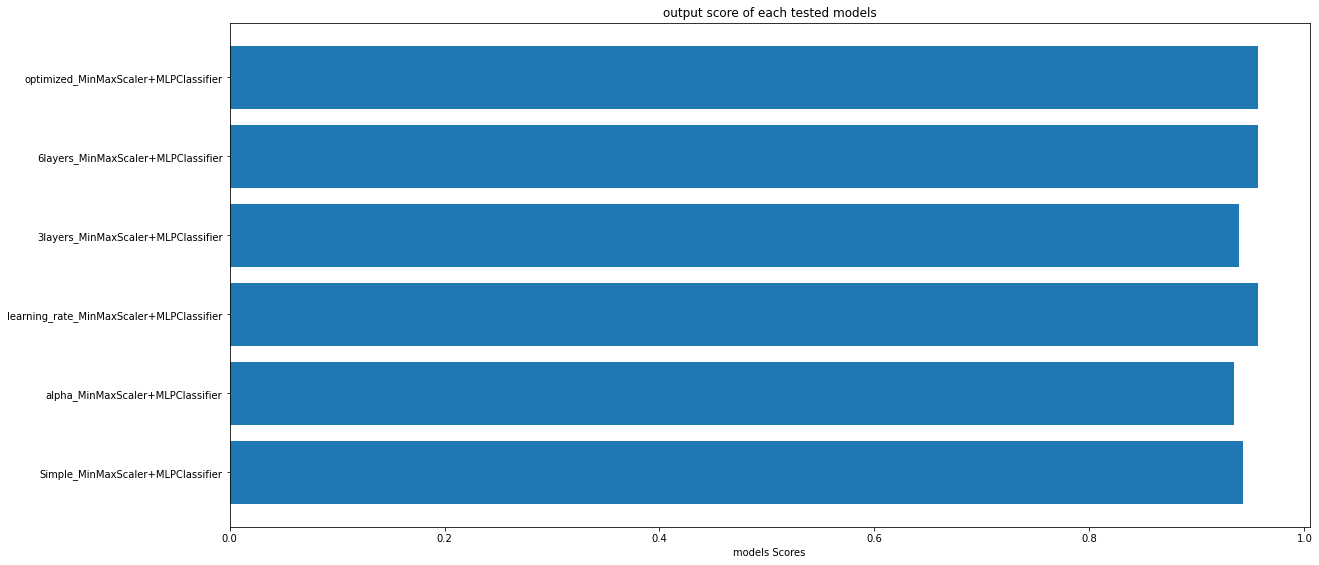

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
ax.barh(step_score_table.step, step_score_table.score)
ax.set_title('output score of each tested models')
ax.set_xlabel('models Scores')
plt.show()

We can see from this plot that the learning rate greatly improved the score compared to the standard estimator.
However here between standard estimator and optimized alpha, the score did drop. Which mean that the range taken in the RandomizedSearchCV is not optimized and should hence be change in order to have a better score than the standard scaler. 
Improving number of intra-layer did improve the overall score of the model too.
Which in the end helped to gain 0.01 point of score.
However the train dataset reprensent only 30% of the oveall dataset which should be used in order to guarantee a better training but would take far more time to compute.


Concerning the number of experiments that should be done in order to find the best parameters it would require far more experiment than done here.
As an exemple, here the parameter alpha don't improve the overall score which mean that the range is not appropriate and should be hence changed. This would hence take more experiments to determine the best range to search alpha.
However for learning rate it only take one experiment since the range is specified in the model documentation and hence in this case require only 1 experiment.